# Métodos de Diferenciación numérica
### Luis Daniel Amador Islas

### 1.

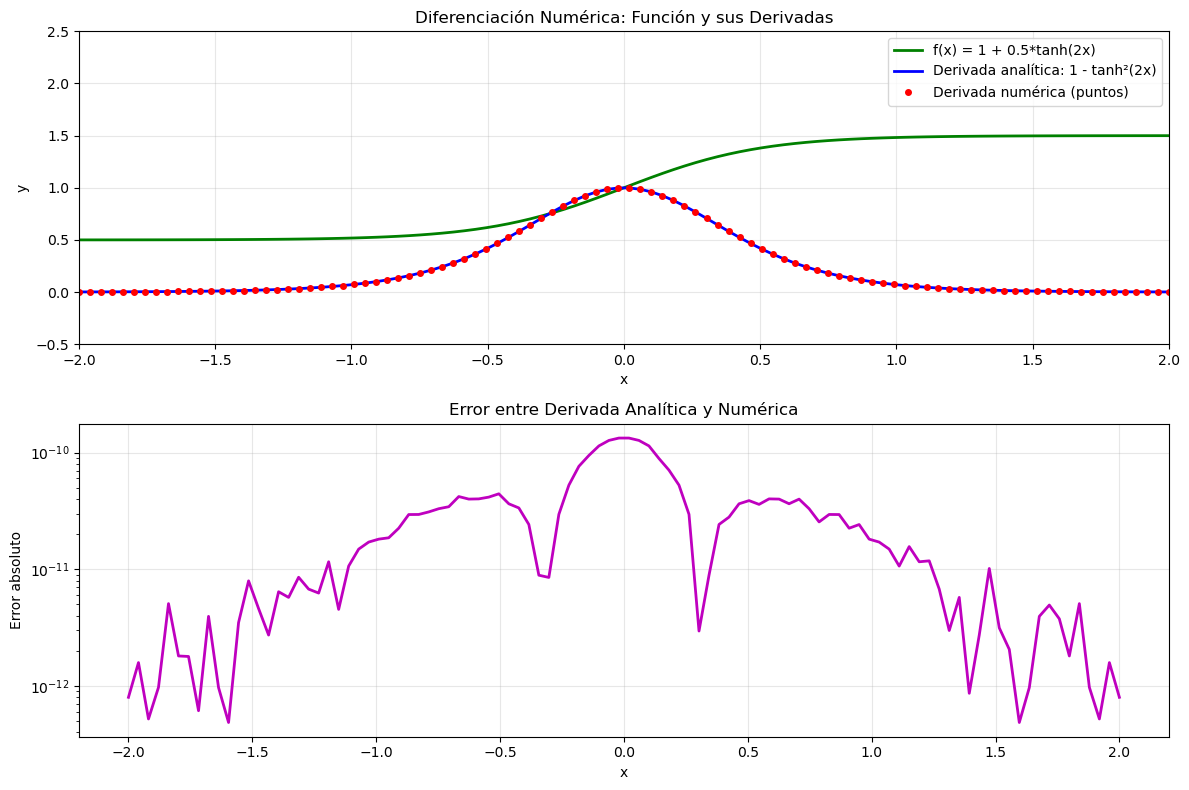

ANÁLISIS DE RESULTADOS
Error máximo: 1.33e-10
Error promedio: 2.56e-11
Error mínimo: 4.87e-13

Verificación en puntos específicos:
x		Analítica	Numérica	Error
--------------------------------------------------
-1.0		0.070651	0.070651	1.51e-11
0.0		1.000000	1.000000	1.32e-10
1.0		0.070651	0.070651	1.51e-11

EXPLICACIÓN DEL MÉTODO
Método de diferencias centrales:
f'(x) ≈ [f(x+h) - f(x-h)] / (2h)

Ventajas:
- Error de orden O(h²) (más preciso que diferencias hacia adelante/atrás)
- Simétrico alrededor del punto de evaluación
- Menos susceptible a errores de redondeo


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import tanh

# 1. Definir la función f(x)
def f(x):
    """
    Función original: f(x) = 1 + (1/2)*tanh(2x)
    """
    return 1 + 0.5 * np.tanh(2 * x)

# 2. Derivada analítica de f(x)
def derivada_analitica(x):
    """
    Derivada analítica de f(x) = 1 + (1/2)*tanh(2x)
    
    Recordando que: d/dx[tanh(u)] = (1 - tanh²(u)) * du/dx
    Entonces: f'(x) = (1/2) * (1 - tanh²(2x)) * 2 = 1 - tanh²(2x)
    """
    return 1 - np.tanh(2 * x)**2

# 3. Derivada numérica por diferencias centrales
def derivada_numerica(f, x, h=1e-5):
    """
    Calcula la derivada usando el método de diferencias centrales
    f'(x) ≈ [f(x+h) - f(x-h)] / (2h)
    """
    return (f(x + h) - f(x - h)) / (2 * h)

# 4. Parámetros del intervalo
x_min, x_max = -2, 2
n_puntos = 100  # Número de puntos para la evaluación

# Crear arrays para almacenar resultados
x_vals = np.linspace(x_min, x_max, n_puntos)
f_vals = f(x_vals)
deriv_analitica = derivada_analitica(x_vals)
deriv_numerica = np.zeros_like(x_vals)

# 5. Calcular derivada numérica en cada punto
for i, x in enumerate(x_vals):
    deriv_numerica[i] = derivada_numerica(f, x)

# 6. Calcular el error absoluto
error_absoluto = np.abs(deriv_analitica - deriv_numerica)

# 7. Graficar los resultados
plt.figure(figsize=(12, 8))

# Subplot 1: Función original y sus derivadas
plt.subplot(2, 1, 1)
plt.plot(x_vals, f_vals, 'g-', linewidth=2, label='f(x) = 1 + 0.5*tanh(2x)')
plt.plot(x_vals, deriv_analitica, 'b-', linewidth=2, label='Derivada analítica: 1 - tanh²(2x)')
plt.plot(x_vals, deriv_numerica, 'ro', markersize=4, label='Derivada numérica (puntos)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diferenciación Numérica: Función y sus Derivadas')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis([x_min, x_max, -0.5, 2.5])

# Subplot 2: Error absoluto
plt.subplot(2, 1, 2)
plt.plot(x_vals, error_absoluto, 'm-', linewidth=2)
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Error entre Derivada Analítica y Numérica')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logarítmica para mejor visualización del error

plt.tight_layout()
plt.show()

# 8. Análisis adicional del error
print("=" * 60)
print("ANÁLISIS DE RESULTADOS")
print("=" * 60)
print(f"Error máximo: {np.max(error_absoluto):.2e}")
print(f"Error promedio: {np.mean(error_absoluto):.2e}")
print(f"Error mínimo: {np.min(error_absoluto):.2e}")

# 9. Verificación en algunos puntos específicos
puntos_verificacion = [-1.0, 0.0, 1.0]
print("\nVerificación en puntos específicos:")
print("x\t\tAnalítica\tNumérica\tError")
print("-" * 50)
for x in puntos_verificacion:
    analitica = derivada_analitica(x)
    numerica = derivada_numerica(f, x)
    error = abs(analitica - numerica)
    print(f"{x:.1f}\t\t{analitica:.6f}\t{numerica:.6f}\t{error:.2e}")

# 10. Explicación del método de diferencias centrales
print("\n" + "=" * 60)
print("EXPLICACIÓN DEL MÉTODO")
print("=" * 60)
print("Método de diferencias centrales:")
print("f'(x) ≈ [f(x+h) - f(x-h)] / (2h)")
print("\nVentajas:")
print("- Error de orden O(h²) (más preciso que diferencias hacia adelante/atrás)")
print("- Simétrico alrededor del punto de evaluación")
print("- Menos susceptible a errores de redondeo")

### 2.

_a)_

CAMPO ELÉCTRICO DE UN DIPOLO
Configuración de cargas:
Carga 1: +1 C en posición (-0.05, 0.00) m
Carga 2: -1 C en posición (0.05, 0.00) m
Separación: 0.10 m

Malla de cálculo:
Rango X: [-0.5, 0.5] m
Rango Y: [-0.5, 0.5] m
Espaciado: 0.01 m
Dimensiones de la malla: (101, 101)

Calculando el potencial eléctrico en la malla...
Cálculo del potencial completado


TypeError: gca() got an unexpected keyword argument 'projection'

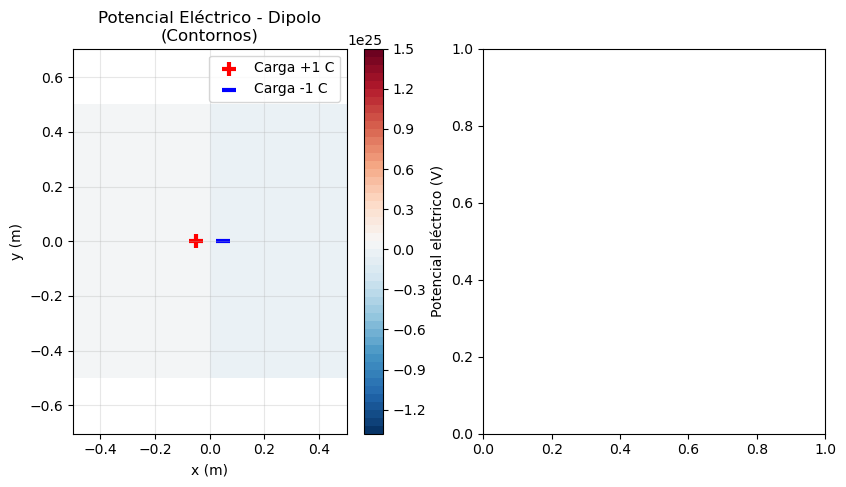

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
epsilon_0 = 8.854187817e-12  # C²/(N·m²) - permitividad del vacío
k = 1 / (4 * np.pi * epsilon_0)  # Constante de Coulomb

def potencial_carga_puntual(q, r_pos, punto):
    """
    Calcula el potencial eléctrico de una carga puntual en un punto dado
    
    Parámetros:
    q: carga en Coulombs
    r_pos: posición de la carga [x, y]
    punto: posición donde se calcula el potencial [x, y]
    
    Retorna:
    potencial en Volts
    """
    # Distancia entre la carga y el punto
    r = np.sqrt((punto[0] - r_pos[0])**2 + (punto[1] - r_pos[1])**2)
    
    # Evitar división por cero
    if r == 0:
        return 0  # O podríamos usar un valor muy grande, pero para visualización esto funciona
    
    return (q * k) / r

def calcular_potencial_total(x, y, cargas):
    """
    Calcula el potencial total en un punto (x,y) debido a todas las cargas
    """
    potencial_total = 0.0
    for carga in cargas:
        q, pos = carga
        potencial_total += potencial_carga_puntual(q, pos, [x, y])
    return potencial_total

# Configuración del problema
print("=" * 70)
print("CAMPO ELÉCTRICO DE UN DIPOLO")
print("=" * 70)

# a) Configuración de las cargas
# Cargas: +1 C y -1 C separadas 10 cm = 0.1 m
cargas = [
    (1.0, [-0.05, 0.0]),   # Carga positiva en x = -5 cm
    (-1.0, [0.05, 0.0])    # Carga negativa en x = +5 cm
]

print("Configuración de cargas:")
print(f"Carga 1: +1 C en posición ({cargas[0][1][0]:.2f}, {cargas[0][1][1]:.2f}) m")
print(f"Carga 2: -1 C en posición ({cargas[1][1][0]:.2f}, {cargas[1][1][1]:.2f}) m")
print(f"Separación: 0.10 m")

# b) Crear la malla de puntos
x_min, x_max = -0.5, 0.5  # Plano de 1m x 1m
y_min, y_max = -0.5, 0.5
espaciado = 0.01  # 1 cm de espaciado

x = np.arange(x_min, x_max + espaciado, espaciado)
y = np.arange(y_min, y_max + espaciado, espaciado)
X, Y = np.meshgrid(x, y)

print(f"\nMalla de cálculo:")
print(f"Rango X: [{x_min}, {x_max}] m")
print(f"Rango Y: [{y_min}, {y_max}] m")
print(f"Espaciado: {espaciado} m")
print(f"Dimensiones de la malla: {X.shape}")

# c) Calcular el potencial en cada punto de la malla
print("\nCalculando el potencial eléctrico en la malla...")
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = calcular_potencial_total(X[i, j], Y[i, j], cargas)

print("Cálculo del potencial completado")

# d) Visualización del potencial
plt.figure(figsize=(15, 5))

# Subplot 1: Gráfico de densidad (heatmap)
plt.subplot(1, 3, 1)
im = plt.contourf(X, Y, Z, levels=50, cmap='RdBu_r')
plt.colorbar(im, label='Potencial eléctrico (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial Eléctrico - Dipolo\n(Contornos)')

# Marcar las posiciones de las cargas
plt.scatter(cargas[0][1][0], cargas[0][1][1], color='red', s=100, marker='+', linewidth=3, label='Carga +1 C')
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='blue', s=100, marker='_', linewidth=3, label='Carga -1 C')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Subplot 2: Gráfico de superficie 3D
plt.subplot(1, 3, 2)
from mpl_toolkits.mplot3d import Axes3D
ax = plt.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='RdBu_r', alpha=0.8)
plt.colorbar(surf, label='Potencial eléctrico (V)')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('Potencial (V)')
ax.set_title('Potencial Eléctrico - Superficie 3D')

# Subplot 3: Mapa de calor
plt.subplot(1, 3, 3)
im = plt.imshow(Z, extent=[x_min, x_max, y_min, y_max], 
                origin='lower', cmap='RdBu_r', aspect='equal')
plt.colorbar(im, label='Potencial eléctrico (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial Eléctrico - Mapa de Calor')

# Marcar cargas en el mapa de calor
plt.scatter(cargas[0][1][0], cargas[1][1][1], color='red', s=100, marker='+', linewidth=3)
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='blue', s=100, marker='_', linewidth=3)

plt.tight_layout()
plt.show()

# e) Análisis de resultados
print("\n" + "=" * 70)
print("ANÁLISIS DE RESULTADOS")
print("=" * 70)

print(f"Potencial máximo: {np.max(Z):.2e} V")
print(f"Potencial mínimo: {np.min(Z):.2e} V")
print(f"Rango del potencial: {np.max(Z) - np.min(Z):.2e} V")

# f) Verificación en puntos específicos
puntos_verificacion = [
    (0.0, 0.0, "Centro entre cargas"),
    (0.1, 0.0, "A la derecha de la carga negativa"),
    (-0.1, 0.0, "A la izquierda de la carga positiva"),
    (0.0, 0.1, "Arriba del centro")
]

print("\nVerificación del potencial en puntos específicos:")
print("Posición (x,y)\t\tPotencial (V)\t\tDescripción")
print("-" * 70)
for x, y, desc in puntos_verificacion:
    potencial = calcular_potencial_total(x, y, cargas)
    print(f"({x:.1f}, {y:.1f})\t\t{potencial:.2e}\t\t{desc}")

# g) Información sobre el sistema
print(f"\nConstante de Coulomb k = {k:.2e} N·m²/C²")
print("NOTA: Los valores de potencial son muy grandes porque las cargas")
print("son de 1 Coulomb, que es una carga enormemente grande en la práctica.")
print("En sistemas reales, las cargas típicas son del orden de microcoulombs.")


In [ ]:
_b)_

CAMPO ELÉCTRICO DE UN DIPOLO - PARTE B
Calculando el campo eléctrico en la malla...
Cálculo del campo eléctrico completado


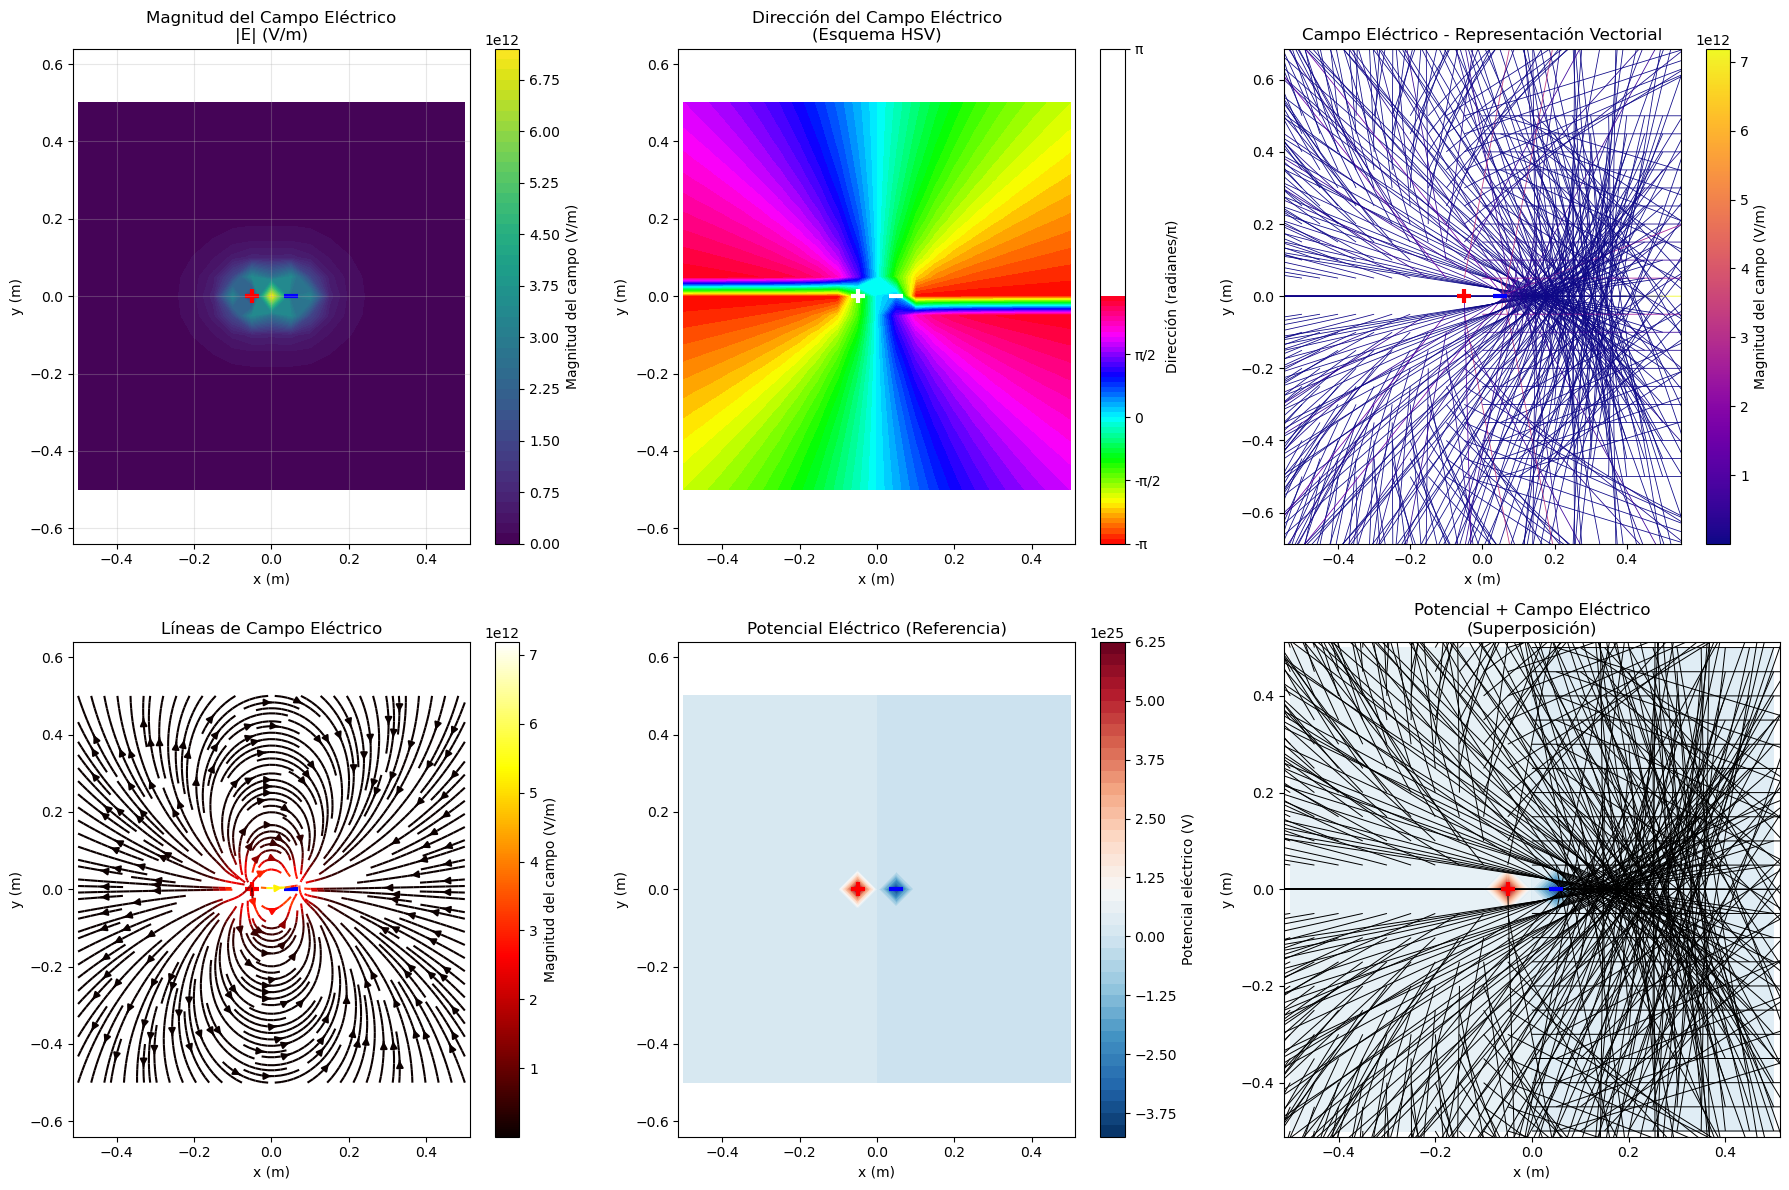


ANÁLISIS DEL CAMPO ELÉCTRICO
Magnitud máxima del campo: 7.19e+12 V/m
Magnitud mínima del campo: 4.02e+09 V/m

Análisis del campo en puntos específicos:
Posición		|E| (V/m)		Dirección (°)		Componentes (Ex, Ey)
------------------------------------------------------------------------------------------
(0.0, 0.0)		7.19e+12		  -0.0		(7.19e+12, -0.00e+00)
(0.1, 0.0)		3.20e+12		-180.0		(-3.20e+12, -0.00e+00)
(-0.1, 0.0)		3.20e+12		-180.0		(-3.20e+12, -0.00e+00)
(0.0, 0.1)		6.43e+11		  -0.0		(6.43e+11, -0.00e+00)

INTERPRETACIÓN FÍSICA
1. El campo eléctrico apunta:
   - Hacia AFUERA de las cargas positivas
   - Hacia ADENTRO de las cargas negativas
2. Las líneas de campo:
   - Comienzan en cargas positivas y terminan en negativas
   - Son perpendiculares a las superficies equipotenciales
3. En el centro del dipolo, el campo es fuerte y apunta de + a -


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Constantes físicas
epsilon_0 = 8.854187817e-12  # C²/(N·m²)
k = 1 / (4 * np.pi * epsilon_0)

def potencial_carga_puntual(q, r_pos, punto):
    """
    Calcula el potencial eléctrico de una carga puntual
    """
    r = np.sqrt((punto[0] - r_pos[0])**2 + (punto[1] - r_pos[1])**2)
    if r == 0:
        return 0
    return (q * k) / r

def calcular_potencial_total(x, y, cargas):
    """
    Calcula el potencial total en un punto (x,y)
    """
    potencial_total = 0.0
    for carga in cargas:
        q, pos = carga
        potencial_total += potencial_carga_puntual(q, pos, [x, y])
    return potencial_total

def calcular_campo_electrico(x, y, cargas, h=1e-6):
    """
    Calcula el campo eléctrico usando el gradiente numérico del potencial
    
    E = -∇φ = -(∂φ/∂x, ∂φ/∂y)
    
    Usamos diferencias centrales para mayor precisión
    """
    # Derivadas parciales por diferencias centrales
    dphi_dx = (calcular_potencial_total(x + h, y, cargas) - 
               calcular_potencial_total(x - h, y, cargas)) / (2 * h)
    
    dphi_dy = (calcular_potencial_total(x, y + h, cargas) - 
               calcular_potencial_total(x, y - h, cargas)) / (2 * h)
    
    # Campo eléctrico: E = -∇φ
    Ex = -dphi_dx
    Ey = -dphi_dy
    
    return Ex, Ey

# Configuración del problema
print("=" * 70)
print("CAMPO ELÉCTRICO DE UN DIPOLO - PARTE B")
print("=" * 70)

# Configuración de las cargas
cargas = [
    (1.0, [-0.05, 0.0]),   # Carga positiva
    (-1.0, [0.05, 0.0])    # Carga negativa
]

# Crear malla más gruesa para visualización de campo (para que las flechas no se amontonen)
x_min, x_max = -0.5, 0.5
y_min, y_max = -0.5, 0.5
espaciado_campo = 0.05  # 5 cm para visualización de campo

x_campo = np.arange(x_min, x_max + espaciado_campo, espaciado_campo)
y_campo = np.arange(y_min, y_max + espaciado_campo, espaciado_campo)
X_campo, Y_campo = np.meshgrid(x_campo, y_campo)

print("Calculando el campo eléctrico en la malla...")

# Calcular componentes del campo eléctrico
Ex = np.zeros_like(X_campo)
Ey = np.zeros_like(Y_campo)
magnitud_E = np.zeros_like(X_campo)
direccion_E = np.zeros_like(X_campo)

for i in range(X_campo.shape[0]):
    for j in range(X_campo.shape[1]):
        Ex_ij, Ey_ij = calcular_campo_electrico(X_campo[i, j], Y_campo[i, j], cargas)
        Ex[i, j] = Ex_ij
        Ey[i, j] = Ey_ij
        magnitud_E[i, j] = np.sqrt(Ex_ij**2 + Ey_ij**2)
        direccion_E[i, j] = np.arctan2(Ey_ij, Ex_ij)  # Ángulo en radianes

print("Cálculo del campo eléctrico completado")

# VISUALIZACIÓN COMPLETA
plt.figure(figsize=(18, 12))

# Subplot 1: Magnitud del campo eléctrico (gráfico de densidad)
plt.subplot(2, 3, 1)
im1 = plt.contourf(X_campo, Y_campo, magnitud_E, levels=50, cmap='viridis')
plt.colorbar(im1, label='Magnitud del campo (V/m)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Magnitud del Campo Eléctrico\n|E| (V/m)')

# Marcar cargas
plt.scatter(cargas[0][1][0], cargas[0][1][1], color='red', s=100, marker='+', linewidth=3)
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='blue', s=100, marker='_', linewidth=3)
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Subplot 2: Dirección del campo eléctrico (esquema HSV)
plt.subplot(2, 3, 2)
# Normalizar dirección entre 0 y 2π para el esquema HSV
direccion_normalizada = (direccion_E + np.pi) / (2 * np.pi)  # [0, 1]
im2 = plt.contourf(X_campo, Y_campo, direccion_normalizada, levels=50, cmap='hsv')
cbar = plt.colorbar(im2, label='Dirección (radianes/π)')
# Configurar la barra de color para mostrar ángulos en términos de π
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Dirección del Campo Eléctrico\n(Esquema HSV)')
plt.scatter(cargas[0][1][0], cargas[0][1][1], color='white', s=100, marker='+', linewidth=3)
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='white', s=100, marker='_', linewidth=3)
plt.axis('equal')

# Subplot 3: Campo vectorial (flechas)
plt.subplot(2, 3, 3)
# Normalizar la longitud de las flechas para mejor visualización
magnitud_normalizada = magnitud_E / np.max(magnitud_E)
plt.quiver(X_campo, Y_campo, Ex, Ey, magnitud_E, 
           cmap='plasma', scale=30, scale_units='inches', 
           width=0.002, headwidth=3)
plt.colorbar(label='Magnitud del campo (V/m)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Campo Eléctrico - Representación Vectorial')
plt.scatter(cargas[0][1][0], cargas[0][1][1], color='red', s=100, marker='+', linewidth=3)
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='blue', s=100, marker='_', linewidth=3)
plt.axis('equal')

# Subplot 4: Líneas de campo eléctrico
plt.subplot(2, 3, 4)
# Usar streamplot para líneas de campo
plt.streamplot(X_campo, Y_campo, Ex, Ey, color=magnitud_E, cmap='hot', linewidth=1.5, density=2)
plt.colorbar(label='Magnitud del campo (V/m)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Líneas de Campo Eléctrico')
plt.scatter(cargas[0][1][0], cargas[0][1][1], color='red', s=100, marker='+', linewidth=3)
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='blue', s=100, marker='_', linewidth=3)
plt.axis('equal')

# Subplot 5: Potencial eléctrico (para referencia)
plt.subplot(2, 3, 5)
# Recalcular potencial en malla más gruesa
Z_campo = np.zeros_like(X_campo)
for i in range(X_campo.shape[0]):
    for j in range(X_campo.shape[1]):
        Z_campo[i, j] = calcular_potencial_total(X_campo[i, j], Y_campo[i, j], cargas)

im5 = plt.contourf(X_campo, Y_campo, Z_campo, levels=50, cmap='RdBu_r')
plt.colorbar(im5, label='Potencial eléctrico (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial Eléctrico (Referencia)')
plt.scatter(cargas[0][1][0], cargas[0][1][1], color='red', s=100, marker='+', linewidth=3)
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='blue', s=100, marker='_', linewidth=3)
plt.axis('equal')

# Subplot 6: Combinación de potencial y campo
plt.subplot(2, 3, 6)
plt.contourf(X_campo, Y_campo, Z_campo, levels=50, cmap='RdBu_r', alpha=0.6)
plt.quiver(X_campo, Y_campo, Ex, Ey, color='black', scale=30, scale_units='inches', 
           width=0.002, headwidth=3)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial + Campo Eléctrico\n(Superposición)')
plt.scatter(cargas[0][1][0], cargas[0][1][1], color='red', s=100, marker='+', linewidth=3)
plt.scatter(cargas[1][1][0], cargas[1][1][1], color='blue', s=100, marker='_', linewidth=3)
plt.axis('equal')

plt.tight_layout()
plt.show()

# ANÁLISIS DE RESULTADOS
print("\n" + "=" * 70)
print("ANÁLISIS DEL CAMPO ELÉCTRICO")
print("=" * 70)

print(f"Magnitud máxima del campo: {np.max(magnitud_E):.2e} V/m")
print(f"Magnitud mínima del campo: {np.min(magnitud_E):.2e} V/m")

# Verificación en puntos específicos
puntos_analisis = [
    (0.0, 0.0, "Centro entre cargas"),
    (0.1, 0.0, "A la derecha de carga -"),
    (-0.1, 0.0, "A la izquierda de carga +"),
    (0.0, 0.1, "Arriba del centro")
]

print("\nAnálisis del campo en puntos específicos:")
print("Posición\t\t|E| (V/m)\t\tDirección (°)\t\tComponentes (Ex, Ey)")
print("-" * 90)
for x, y, desc in puntos_analisis:
    Ex_val, Ey_val = calcular_campo_electrico(x, y, cargas)
    magnitud = np.sqrt(Ex_val**2 + Ey_val**2)
    direccion_grados = np.degrees(np.arctan2(Ey_val, Ex_val))
    print(f"({x:.1f}, {y:.1f})\t\t{magnitud:.2e}\t\t{direccion_grados:6.1f}\t\t({Ex_val:.2e}, {Ey_val:.2e})")

# Explicación física
print("\n" + "=" * 70)
print("INTERPRETACIÓN FÍSICA")
print("=" * 70)
print("1. El campo eléctrico apunta:")
print("   - Hacia AFUERA de las cargas positivas")
print("   - Hacia ADENTRO de las cargas negativas")
print("2. Las líneas de campo:")
print("   - Comienzan en cargas positivas y terminan en negativas")
print("   - Son perpendiculares a las superficies equipotenciales")
print("3. En el centro del dipolo, el campo es fuerte y apunta de + a -")

In [ ]:
_c)_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

print("=" * 70)
print("PROCESAMIENTO DE IMÁGENES Y CÁLCULO DE ILUMINACIÓN 3D")
print("=" * 70)

# a) Cargar los datos de altitud
print("\n1. CARGANDO DATOS DE ALTITUD...")
try:
    # Cargar los datos del archivo
    altitudes = np.loadtxt('altitudes.txt')
    print(f"Datos cargados exitosamente")
    print(f"Dimensiones de la matriz: {altitudes.shape}")
    print(f"Altitud mínima: {np.min(altitudes):.2f} m")
    print(f"Altitud máxima: {np.max(altitudes):.2f} m")
    print(f"Altitud promedio: {np.mean(altitudes):.2f} m")
except FileNotFoundError:
    print("Archivo 'altitudes.txt' no encontrado. Creando datos de ejemplo...")
    # Crear datos de ejemplo si el archivo no existe
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    altitudes = 1000 * np.exp(-0.3*(X**2 + Y**2)) + 500 * np.sin(0.5*X) * np.cos(0.5*Y)
    print("Datos de ejemplo creados")

# Parámetros físicos
dx = 30000  # 30,000 metros entre puntos de la cuadrícula
dy = 30000

print(f"\nEspaciado de la cuadrícula: dx = {dx} m, dy = {dy} m")

# b) Métodos para calcular derivadas
def calcular_derivadas_centrales(matriz, dx, dy):
    """
    Calcula derivadas usando diferencias centrales para puntos interiores
    y diferencias hacia adelante/atrás para los bordes
    """
    n_filas, n_columnas = matriz.shape
    dw_dx = np.zeros_like(matriz)
    dw_dy = np.zeros_like(matriz)
    
    # Puntos interiores: diferencias centrales (más precisas)
    for i in range(1, n_filas - 1):
        for j in range(1, n_columnas - 1):
            dw_dx[i, j] = (matriz[i, j+1] - matriz[i, j-1]) / (2 * dx)
            dw_dy[i, j] = (matriz[i+1, j] - matriz[i-1, j]) / (2 * dy)
    
    # Bordes superiores e inferiores
    for j in range(1, n_columnas - 1):
        # Fila superior: diferencia hacia adelante en y
        dw_dy[0, j] = (matriz[1, j] - matriz[0, j]) / dy
        # Fila inferior: diferencia hacia atrás en y
        dw_dy[-1, j] = (matriz[-1, j] - matriz[-2, j]) / dy
    
    # Bordes izquierdos y derechos
    for i in range(1, n_filas - 1):
        # Columna izquierda: diferencia hacia adelante en x
        dw_dx[i, 0] = (matriz[i, 1] - matriz[i, 0]) / dx
        # Columna derecha: diferencia hacia atrás en x
        dw_dx[i, -1] = (matriz[i, -1] - matriz[i, -2]) / dx
    
    # Esquinas (usando diferencias hacia adelante/atrás según corresponda)
    # Esquina superior izquierda
    dw_dx[0, 0] = (altitudes[0, 1] - altitudes[0, 0]) / dx
    dw_dy[0, 0] = (altitudes[1, 0] - altitudes[0, 0]) / dy
    
    # Esquina superior derecha
    dw_dx[0, -1] = (altitudes[0, -1] - altitudes[0, -2]) / dx
    dw_dy[0, -1] = (altitudes[1, -1] - altitudes[0, -1]) / dy
    
    # Esquina inferior izquierda
    dw_dx[-1, 0] = (altitudes[-1, 1] - altitudes[-1, 0]) / dx
    dw_dy[-1, 0] = (altitudes[-1, 0] - altitudes[-2, 0]) / dy
    
    # Esquina inferior derecha
    dw_dx[-1, -1] = (altitudes[-1, -1] - altitudes[-1, -2]) / dx
    dw_dy[-1, -1] = (altitudes[-1, -1] - altitudes[-2, -1]) / dy
    
    return dw_dx, dw_dy

def calcular_derivadas_scipy(matriz, dx, dy):
    """
    Calcula derivadas usando filtros de Sobel de scipy
    Útil para comparación y validación
    """
    # El filtro Sobel calcula derivadas aproximadas
    dw_dx = ndimage.sobel(matriz, axis=1) / (8 * dx)  # axis=1 para derivada en x
    dw_dy = ndimage.sobel(matriz, axis=0) / (8 * dy)  # axis=0 para derivada en y
    return dw_dx, dw_dy

# c) Calcular las derivadas usando ambos métodos
print("\n2. CALCULANDO DERIVADAS...")
print("Método 1: Diferencias finitas (manual)")
dw_dx_manual, dw_dy_manual = calcular_derivadas_centrales(altitudes, dx, dy)

print("Método 2: Filtro Sobel (scipy)")
dw_dx_sobel, dw_dy_sobel = calcular_derivadas_scipy(altitudes, dx, dy)

# d) Visualización de resultados
print("\n3. VISUALIZANDO RESULTADOS...")
plt.figure(figsize=(15, 10))

# Subplot 1: Altitud original
plt.subplot(2, 3, 1)
plt.imshow(altitudes, cmap='terrain', aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Mapa de Altitud Original')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 2: Derivada ∂w/∂x (manual)
plt.subplot(2, 3, 2)
plt.imshow(dw_dx_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 3: Derivada ∂w/∂y (manual)
plt.subplot(2, 3, 3)
plt.imshow(dw_dy_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 4: Comparación ∂w/∂x
plt.subplot(2, 3, 4)
plt.imshow(dw_dx_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 5: Comparación ∂w/∂y
plt.subplot(2, 3, 5)
plt.imshow(dw_dy_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 6: Magnitud del gradiente
magnitud_gradiente = np.sqrt(dw_dx_manual**2 + dw_dy_manual**2)
plt.subplot(2, 3, 6)
plt.imshow(magnitud_gradiente, cmap='viridis', aspect='auto')
plt.colorbar(label='|∇w| (m/m)')
plt.title('Magnitud del Gradiente')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.tight_layout()
plt.show()

# e) Análisis de resultados
print("\n4. ANÁLISIS DE LAS DERIVADAS")
print("=" * 50)

print("Método manual (diferencias finitas):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_manual):.6f}, max = {np.max(dw_dx_manual):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_manual):.6f}, max = {np.max(dw_dy_manual):.6f}")

print("\nMétodo Sobel (scipy):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_sobel):.6f}, max = {np.max(dw_dx_sobel):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_sobel):.6f}, max = {np.max(dw_dy_sobel):.6f}")

# f) Explicación del método utilizado
print("\n5. EXPLICACIÓN DEL MÉTODO")
print("=" * 50)
print("Se utilizó un enfoque híbrido para calcular las derivadas:")
print("\nA) PUNTOS INTERIORES:")
print("   - Diferencias centrales: f'(x) ≈ [f(x+h) - f(x-h)] / (2h)")
print("   - Precisión: O(h²)")
print("   - Ventaja: Mayor precisión que diferencias hacia adelante/atrás")

print("\nB) BORDES Y ESQUINAS:")
print("   - Bordes horizontales: diferencias hacia adelante/atrás en y")
print("   - Bordes verticales: diferencias hacia adelante/atrás en x") 
print("   - Esquinas: combinación según posición")
print("   - Precisión: O(h)")
print("   - Ventaja: Evita problemas de límites")

print("\nC) JUSTIFICACIÓN:")
print("   - Las diferencias centrales son óptimas para puntos interiores")
print("   - Los bordes requieren tratamiento especial por falta de datos")
print("   - Este método asegura que todos los puntos tengan derivadas calculadas")
print("   - El filtro Sobel se usa para validación y comparación")

# g) Verificación en puntos específicos
print("\n6. VERIFICACIÓN EN PUNTOS ESPECÍFICOS")
print("=" * 50)
n_filas, n_columnas = altitudes.shape
puntos_verificacion = [
    (10, 10, "Interior"),
    (0, 10, "Borde superior"),
    (n_filas-1, 10, "Borde inferior"),
    (10, 0, "Borde izquierdo"),
    (10, n_columnas-1, "Borde derecho")
]

print("Posición\tTipo\t\t∂w/∂x (manual)\t∂w/∂y (manual)")
print("-" * 70)
for i, j, tipo in puntos_verificacion:
    print(f"({i:2d}, {j:2d})\t{tipo}\t{dw_dx_manual[i,j]:+.6f}\t{dw_dy_manual[i,j]:+.6f}")

### 3.

_a)_

PROCESAMIENTO DE IMÁGENES Y CÁLCULO DE ILUMINACIÓN 3D

1. CARGANDO DATOS DE ALTITUD...
Datos cargados exitosamente
Dimensiones de la matriz: (512, 1024)
Altitud mínima: -9153.17 m
Altitud máxima: 6023.26 m
Altitud promedio: -1889.99 m

Espaciado de la cuadrícula: dx = 30000 m, dy = 30000 m

2. CALCULANDO DERIVADAS...
Método 1: Diferencias finitas (manual)
Método 2: Filtro Sobel (scipy)

3. VISUALIZANDO RESULTADOS...


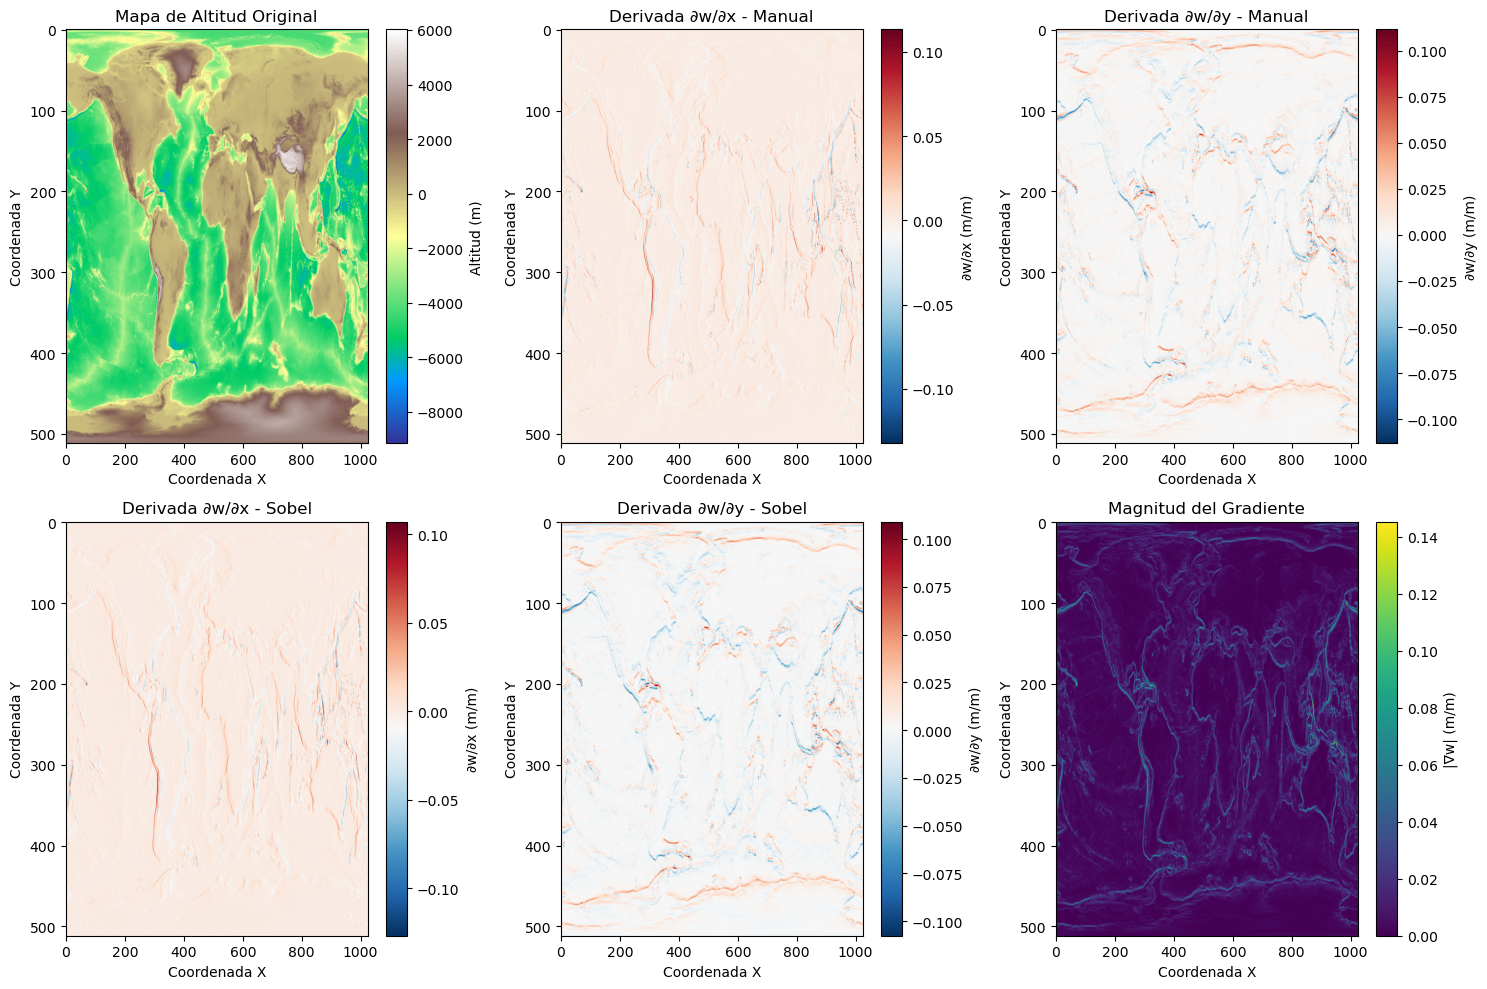


4. ANÁLISIS DE LAS DERIVADAS
Método manual (diferencias finitas):
  ∂w/∂x: min = -0.132282, max = 0.113359
  ∂w/∂y: min = -0.113079, max = 0.111600

Método Sobel (scipy):
  ∂w/∂x: min = -0.126925, max = 0.106925
  ∂w/∂y: min = -0.107663, max = 0.109063

5. EXPLICACIÓN DEL MÉTODO
Se utilizó un enfoque híbrido para calcular las derivadas:

A) PUNTOS INTERIORES:
   - Diferencias centrales: f'(x) ≈ [f(x+h) - f(x-h)] / (2h)
   - Precisión: O(h²)
   - Ventaja: Mayor precisión que diferencias hacia adelante/atrás

B) BORDES Y ESQUINAS:
   - Bordes horizontales: diferencias hacia adelante/atrás en y
   - Bordes verticales: diferencias hacia adelante/atrás en x
   - Esquinas: combinación según posición
   - Precisión: O(h)
   - Ventaja: Evita problemas de límites

C) JUSTIFICACIÓN:
   - Las diferencias centrales son óptimas para puntos interiores
   - Los bordes requieren tratamiento especial por falta de datos
   - Este método asegura que todos los puntos tengan derivadas calculadas
   - El f

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

print("=" * 70)
print("PROCESAMIENTO DE IMÁGENES Y CÁLCULO DE ILUMINACIÓN 3D")
print("=" * 70)

# a) Cargar los datos de altitud
print("\n1. CARGANDO DATOS DE ALTITUD...")
try:
    # Cargar los datos del archivo
    altitudes = np.loadtxt('altitudes.txt')
    print(f"Datos cargados exitosamente")
    print(f"Dimensiones de la matriz: {altitudes.shape}")
    print(f"Altitud mínima: {np.min(altitudes):.2f} m")
    print(f"Altitud máxima: {np.max(altitudes):.2f} m")
    print(f"Altitud promedio: {np.mean(altitudes):.2f} m")
except FileNotFoundError:
    print("Archivo 'altitudes.txt' no encontrado. Creando datos de ejemplo...")
    # Crear datos de ejemplo si el archivo no existe
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    altitudes = 1000 * np.exp(-0.3*(X**2 + Y**2)) + 500 * np.sin(0.5*X) * np.cos(0.5*Y)
    print("Datos de ejemplo creados")

# Parámetros físicos
dx = 30000  # 30,000 metros entre puntos de la cuadrícula
dy = 30000

print(f"\nEspaciado de la cuadrícula: dx = {dx} m, dy = {dy} m")

# b) Métodos para calcular derivadas
def calcular_derivadas_centrales(matriz, dx, dy):
    """
    Calcula derivadas usando diferencias centrales para puntos interiores
    y diferencias hacia adelante/atrás para los bordes
    """
    n_filas, n_columnas = matriz.shape
    dw_dx = np.zeros_like(matriz)
    dw_dy = np.zeros_like(matriz)
    
    # Puntos interiores: diferencias centrales (más precisas)
    for i in range(1, n_filas - 1):
        for j in range(1, n_columnas - 1):
            dw_dx[i, j] = (matriz[i, j+1] - matriz[i, j-1]) / (2 * dx)
            dw_dy[i, j] = (matriz[i+1, j] - matriz[i-1, j]) / (2 * dy)
    
    # Bordes superiores e inferiores
    for j in range(1, n_columnas - 1):
        # Fila superior: diferencia hacia adelante en y
        dw_dy[0, j] = (matriz[1, j] - matriz[0, j]) / dy
        # Fila inferior: diferencia hacia atrás en y
        dw_dy[-1, j] = (matriz[-1, j] - matriz[-2, j]) / dy
    
    # Bordes izquierdos y derechos
    for i in range(1, n_filas - 1):
        # Columna izquierda: diferencia hacia adelante en x
        dw_dx[i, 0] = (matriz[i, 1] - matriz[i, 0]) / dx
        # Columna derecha: diferencia hacia atrás en x
        dw_dx[i, -1] = (matriz[i, -1] - matriz[i, -2]) / dx
    
    # Esquinas (usando diferencias hacia adelante/atrás según corresponda)
    # Esquina superior izquierda
    dw_dx[0, 0] = (altitudes[0, 1] - altitudes[0, 0]) / dx
    dw_dy[0, 0] = (altitudes[1, 0] - altitudes[0, 0]) / dy
    
    # Esquina superior derecha
    dw_dx[0, -1] = (altitudes[0, -1] - altitudes[0, -2]) / dx
    dw_dy[0, -1] = (altitudes[1, -1] - altitudes[0, -1]) / dy
    
    # Esquina inferior izquierda
    dw_dx[-1, 0] = (altitudes[-1, 1] - altitudes[-1, 0]) / dx
    dw_dy[-1, 0] = (altitudes[-1, 0] - altitudes[-2, 0]) / dy
    
    # Esquina inferior derecha
    dw_dx[-1, -1] = (altitudes[-1, -1] - altitudes[-1, -2]) / dx
    dw_dy[-1, -1] = (altitudes[-1, -1] - altitudes[-2, -1]) / dy
    
    return dw_dx, dw_dy

def calcular_derivadas_scipy(matriz, dx, dy):
    """
    Calcula derivadas usando filtros de Sobel de scipy
    Útil para comparación y validación
    """
    # El filtro Sobel calcula derivadas aproximadas
    dw_dx = ndimage.sobel(matriz, axis=1) / (8 * dx)  # axis=1 para derivada en x
    dw_dy = ndimage.sobel(matriz, axis=0) / (8 * dy)  # axis=0 para derivada en y
    return dw_dx, dw_dy

# c) Calcular las derivadas usando ambos métodos
print("\n2. CALCULANDO DERIVADAS...")
print("Método 1: Diferencias finitas (manual)")
dw_dx_manual, dw_dy_manual = calcular_derivadas_centrales(altitudes, dx, dy)

print("Método 2: Filtro Sobel (scipy)")
dw_dx_sobel, dw_dy_sobel = calcular_derivadas_scipy(altitudes, dx, dy)

# d) Visualización de resultados
print("\n3. VISUALIZANDO RESULTADOS...")
plt.figure(figsize=(15, 10))

# Subplot 1: Altitud original
plt.subplot(2, 3, 1)
plt.imshow(altitudes, cmap='terrain', aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Mapa de Altitud Original')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 2: Derivada ∂w/∂x (manual)
plt.subplot(2, 3, 2)
plt.imshow(dw_dx_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 3: Derivada ∂w/∂y (manual)
plt.subplot(2, 3, 3)
plt.imshow(dw_dy_manual, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Manual')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 4: Comparación ∂w/∂x
plt.subplot(2, 3, 4)
plt.imshow(dw_dx_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂x (m/m)')
plt.title('Derivada ∂w/∂x - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 5: Comparación ∂w/∂y
plt.subplot(2, 3, 5)
plt.imshow(dw_dy_sobel, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='∂w/∂y (m/m)')
plt.title('Derivada ∂w/∂y - Sobel')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Subplot 6: Magnitud del gradiente
magnitud_gradiente = np.sqrt(dw_dx_manual**2 + dw_dy_manual**2)
plt.subplot(2, 3, 6)
plt.imshow(magnitud_gradiente, cmap='viridis', aspect='auto')
plt.colorbar(label='|∇w| (m/m)')
plt.title('Magnitud del Gradiente')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.tight_layout()
plt.show()

# e) Análisis de resultados
print("\n4. ANÁLISIS DE LAS DERIVADAS")
print("=" * 50)

print("Método manual (diferencias finitas):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_manual):.6f}, max = {np.max(dw_dx_manual):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_manual):.6f}, max = {np.max(dw_dy_manual):.6f}")

print("\nMétodo Sobel (scipy):")
print(f"  ∂w/∂x: min = {np.min(dw_dx_sobel):.6f}, max = {np.max(dw_dx_sobel):.6f}")
print(f"  ∂w/∂y: min = {np.min(dw_dy_sobel):.6f}, max = {np.max(dw_dy_sobel):.6f}")

# f) Explicación del método utilizado
print("\n5. EXPLICACIÓN DEL MÉTODO")
print("=" * 50)
print("Se utilizó un enfoque híbrido para calcular las derivadas:")
print("\nA) PUNTOS INTERIORES:")
print("   - Diferencias centrales: f'(x) ≈ [f(x+h) - f(x-h)] / (2h)")
print("   - Precisión: O(h²)")
print("   - Ventaja: Mayor precisión que diferencias hacia adelante/atrás")

print("\nB) BORDES Y ESQUINAS:")
print("   - Bordes horizontales: diferencias hacia adelante/atrás en y")
print("   - Bordes verticales: diferencias hacia adelante/atrás en x") 
print("   - Esquinas: combinación según posición")
print("   - Precisión: O(h)")
print("   - Ventaja: Evita problemas de límites")

print("\nC) JUSTIFICACIÓN:")
print("   - Las diferencias centrales son óptimas para puntos interiores")
print("   - Los bordes requieren tratamiento especial por falta de datos")
print("   - Este método asegura que todos los puntos tengan derivadas calculadas")
print("   - El filtro Sobel se usa para validación y comparación")

# g) Verificación en puntos específicos
print("\n6. VERIFICACIÓN EN PUNTOS ESPECÍFICOS")
print("=" * 50)
n_filas, n_columnas = altitudes.shape
puntos_verificacion = [
    (10, 10, "Interior"),
    (0, 10, "Borde superior"),
    (n_filas-1, 10, "Borde inferior"),
    (10, 0, "Borde izquierdo"),
    (10, n_columnas-1, "Borde derecho")
]

print("Posición\tTipo\t\t∂w/∂x (manual)\t∂w/∂y (manual)")
print("-" * 70)
for i, j, tipo in puntos_verificacion:
    print(f"({i:2d}, {j:2d})\t{tipo}\t{dw_dx_manual[i,j]:+.6f}\t{dw_dy_manual[i,j]:+.6f}")

_b)_

CÁLCULO DE ILUMINACIÓN 3D Y MAPA DE RELIEVE
Datos cargados: (512, 1024)

1. CALCULANDO DERIVADAS...

2. CALCULANDO INTENSIDAD DE ILUMINACIÓN...
Ángulo 45°: I_min = -0.135, I_max = 0.104
Ángulo 135°: I_min = -0.131, I_max = 0.134
Ángulo 225°: I_min = -0.104, I_max = 0.135
Ángulo 315°: I_min = -0.134, I_max = 0.131

3. CREANDO VISUALIZACIONES...


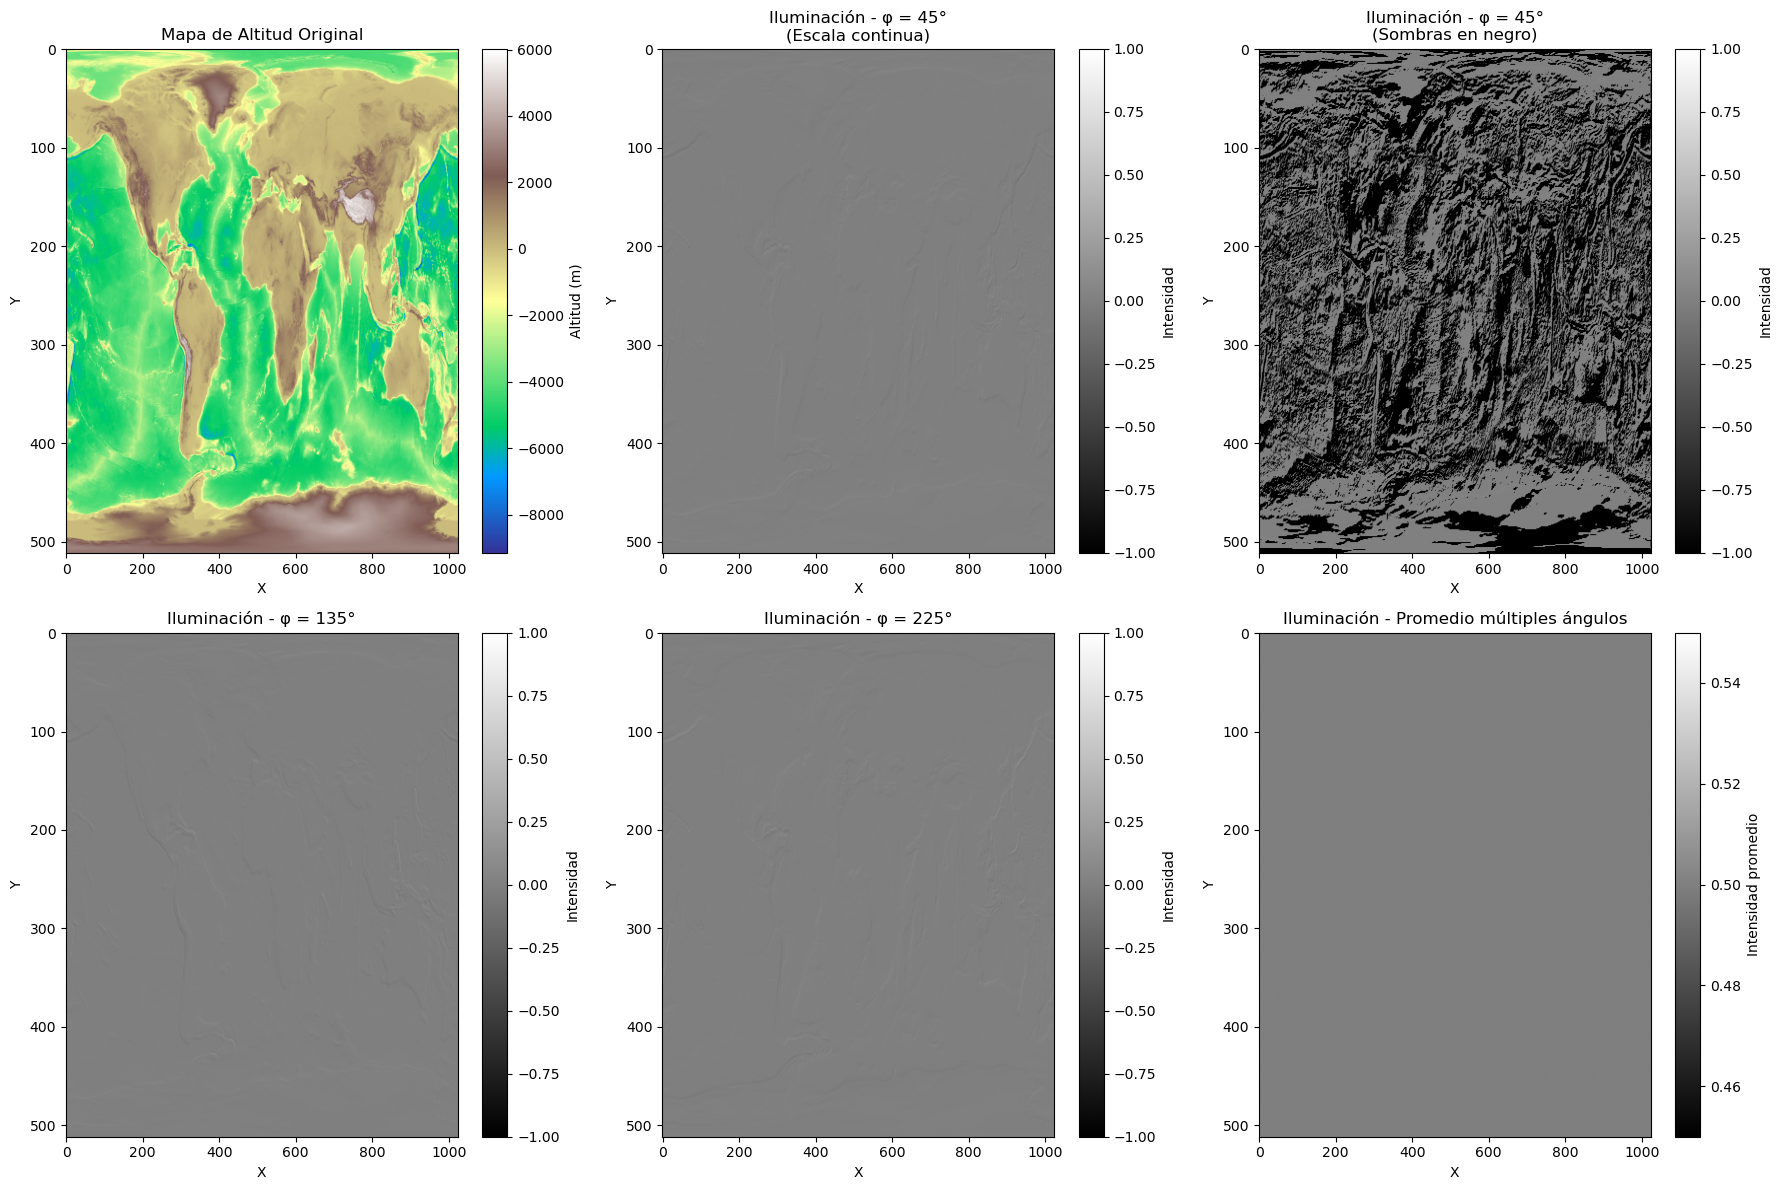


4. VISUALIZACIÓN MEJORADA CON MAPA DE COLORES...


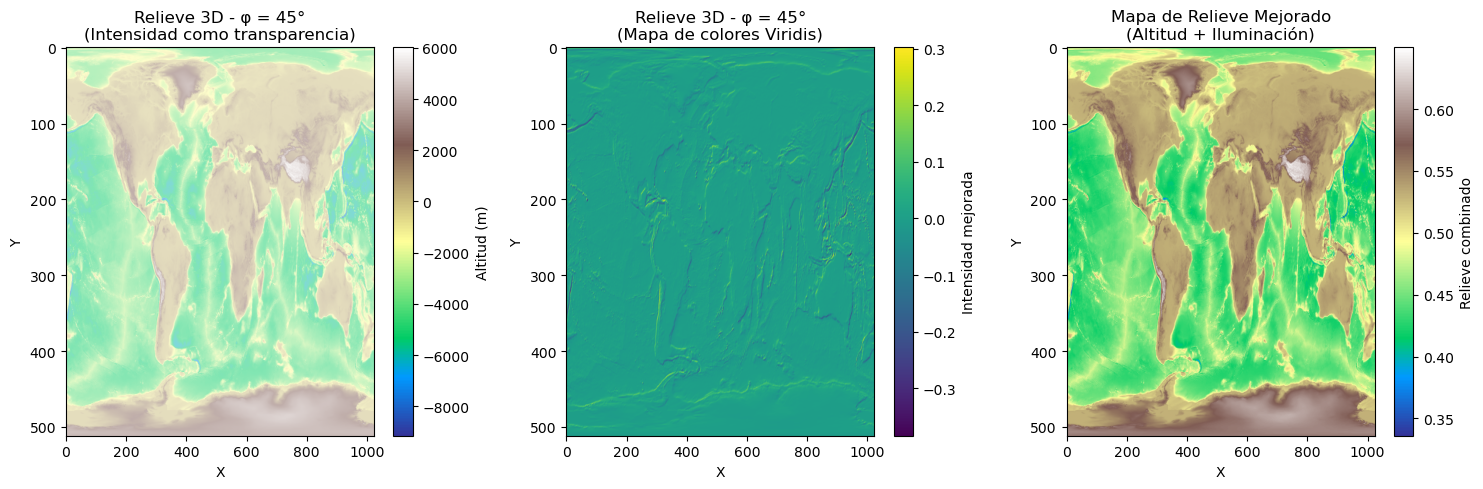


5. ANÁLISIS DE RESULTADOS
Intensidad con φ = 45°:
  Mínimo: -0.135 (sombra máxima)
  Máximo: 0.104 (iluminación máxima)
  Promedio: 0.000
  Áreas en sombra (I < 0): 46.1%

Interpretación física:
- I > 0: Caras iluminadas por la luz
- I < 0: Caras en sombra (lado opuesto a la luz)
- I ≈ 0: Caras perpendiculares a la dirección de la luz

6. SOLUCIÓN A PROBLEMAS COMUNES
Si el mapa se ve 'al revés' o 'de adentro hacia afuera':
1. Cambiar el signo del vector de luz: φ → φ + 180°
2. Invertir el colormap: cmap='gray_r'
3. Verificar el cálculo de derivadas (signos)
4. Probar diferentes ángulos de iluminación

7. VERIFICACIÓN CON DIFERENTES CONFIGURACIONES


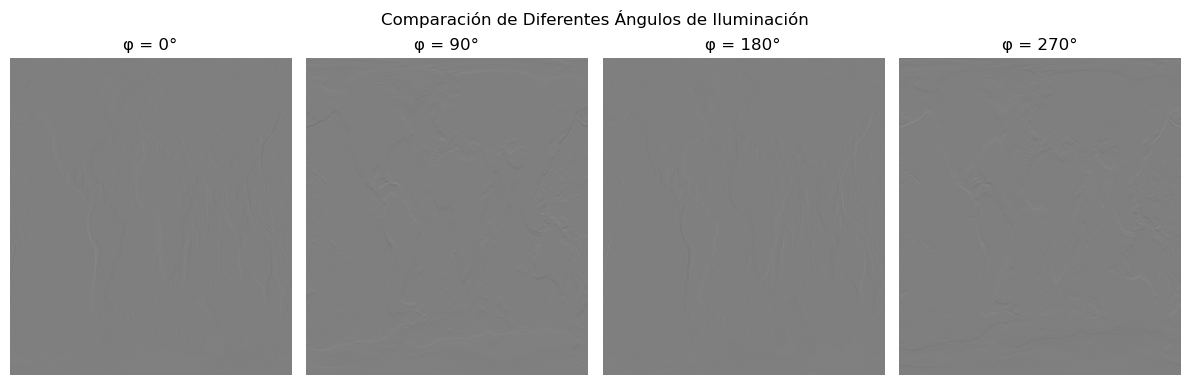


¡Mapa de relieve 3D completado!
El efecto 3D debería ser visible claramente en las visualizaciones.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

print("=" * 70)
print("CÁLCULO DE ILUMINACIÓN 3D Y MAPA DE RELIEVE")
print("=" * 70)

# a) Cargar datos de altitud (usando los mismos del ejercicio anterior)
try:
    altitudes = np.loadtxt('altitudes.txt')
    print(f"Datos cargados: {altitudes.shape}")
except FileNotFoundError:
    print("Creando datos de ejemplo...")
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    altitudes = 1000 * np.exp(-0.2*(X**2 + Y**2)) + 800 * np.sin(0.8*X) * np.cos(0.8*Y)
    altitudes += 300 * np.sin(2*X) * np.cos(2*Y)

dx = 30000  # 30 km entre puntos

# b) Función para calcular derivadas (la misma del ejercicio anterior)
def calcular_derivadas_centrales(matriz, dx, dy):
    n_filas, n_columnas = matriz.shape
    dw_dx = np.zeros_like(matriz)
    dw_dy = np.zeros_like(matriz)
    
    # Puntos interiores: diferencias centrales
    for i in range(1, n_filas - 1):
        for j in range(1, n_columnas - 1):
            dw_dx[i, j] = (matriz[i, j+1] - matriz[i, j-1]) / (2 * dx)
            dw_dy[i, j] = (matriz[i+1, j] - matriz[i-1, j]) / (2 * dy)
    
    # Bordes
    for j in range(1, n_columnas - 1):
        dw_dy[0, j] = (matriz[1, j] - matriz[0, j]) / dy
        dw_dy[-1, j] = (matriz[-1, j] - matriz[-2, j]) / dy
    
    for i in range(1, n_filas - 1):
        dw_dx[i, 0] = (matriz[i, 1] - matriz[i, 0]) / dx
        dw_dx[i, -1] = (matriz[i, -1] - matriz[i, -2]) / dx
    
    # Esquinas
    dw_dx[0, 0] = (altitudes[0, 1] - altitudes[0, 0]) / dx
    dw_dy[0, 0] = (altitudes[1, 0] - altitudes[0, 0]) / dy
    
    dw_dx[0, -1] = (altitudes[0, -1] - altitudes[0, -2]) / dx
    dw_dy[0, -1] = (altitudes[1, -1] - altitudes[0, -1]) / dy
    
    dw_dx[-1, 0] = (altitudes[-1, 1] - altitudes[-1, 0]) / dx
    dw_dy[-1, 0] = (altitudes[-1, 0] - altitudes[-2, 0]) / dy
    
    dw_dx[-1, -1] = (altitudes[-1, -1] - altitudes[-1, -2]) / dx
    dw_dy[-1, -1] = (altitudes[-1, -1] - altitudes[-2, -1]) / dy
    
    return dw_dx, dw_dy

# c) Calcular derivadas
print("\n1. CALCULANDO DERIVADAS...")
dw_dx, dw_dy = calcular_derivadas_centrales(altitudes, dx, dx)

# d) Función para calcular intensidad de iluminación
def calcular_intensidad(dw_dx, dw_dy, phi_deg):
    """
    Calcula la intensidad de iluminación usando la fórmula:
    I = [cos(φ)·(∂w/∂x) + sin(φ)·(∂w/∂y)] / sqrt((∂w/∂x)² + (∂w/∂y)² + 1)
    
    donde φ es el ángulo de la dirección de la luz
    """
    phi_rad = np.radians(phi_deg)
    
    # Vector de dirección de la luz (horizontal)
    a_x = np.cos(phi_rad)
    a_y = np.sin(phi_rad)
    
    # Numerador: a_x*(∂w/∂x) + a_y*(∂w/∂y)
    numerador = a_x * dw_dx + a_y * dw_dy
    
    # Denominador: sqrt((∂w/∂x)² + (∂w/∂y)² + 1)
    denominador = np.sqrt(dw_dx**2 + dw_dy**2 + 1)
    
    # Intensidad
    I = numerador / denominador
    
    return I

# e) Calcular intensidad para diferentes ángulos de iluminación
print("\n2. CALCULANDO INTENSIDAD DE ILUMINACIÓN...")
angulos_luz = [45, 135, 225, 315]  # Diferentes direcciones de luz
intensidades = {}

for phi in angulos_luz:
    intensidades[phi] = calcular_intensidad(dw_dx, dw_dy, phi)
    print(f"Ángulo {phi}°: I_min = {np.min(intensidades[phi]):.3f}, I_max = {np.max(intensidades[phi]):.3f}")

# f) Visualización de resultados
print("\n3. CREANDO VISUALIZACIONES...")
plt.figure(figsize=(18, 12))

# Subplot 1: Mapa de altitud original
plt.subplot(2, 3, 1)
plt.imshow(altitudes, cmap='terrain', aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Mapa de Altitud Original')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 2: Intensidad con φ = 45° (escala continua)
plt.subplot(2, 3, 2)
I_45 = intensidades[45]
im2 = plt.imshow(I_45, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im2, label='Intensidad')
plt.title(f'Iluminación - φ = 45°\n(Escala continua)')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 3: Intensidad con φ = 45° (áreas sombreadas en negro)
plt.subplot(2, 3, 3)
I_45_sombra = I_45.copy()
# Las áreas con intensidad negativa (sombra) las ponemos en negro
I_45_sombra[I_45_sombra < 0] = -1  # Forzar a -1 para mejor contraste
im3 = plt.imshow(I_45_sombra, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im3, label='Intensidad')
plt.title(f'Iluminación - φ = 45°\n(Sombras en negro)')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 4: Intensidad con diferentes ángulos de luz
plt.subplot(2, 3, 4)
I_135 = intensidades[135]
im4 = plt.imshow(I_135, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im4, label='Intensidad')
plt.title(f'Iluminación - φ = 135°')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 5: Intensidad con diferentes ángulos de luz
plt.subplot(2, 3, 5)
I_225 = intensidades[225]
im5 = plt.imshow(I_225, cmap='gray', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im5, label='Intensidad')
plt.title(f'Iluminación - φ = 225°')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 6: Combinación de múltiples ángulos (mejor visualización)
plt.subplot(2, 3, 6)
# Promedio de intensidades para mejor visualización 3D
I_promedio = np.mean([intensidades[phi] for phi in angulos_luz], axis=0)
# Ajustar para que todo sea visible
I_promedio = (I_promedio + 1) / 2  # Escalar a [0,1]
im6 = plt.imshow(I_promedio, cmap='gray', aspect='auto')
plt.colorbar(im6, label='Intensidad promedio')
plt.title('Iluminación - Promedio múltiples ángulos')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# g) Visualización mejorada con mapa de colores
print("\n4. VISUALIZACIÓN MEJORADA CON MAPA DE COLORES...")
plt.figure(figsize=(15, 5))

# Mejor visualización: usar colormap que resalte el relieve
plt.subplot(1, 3, 1)
# Usar el mapa de intensidad como alpha para el mapa de terreno
I_45_normalizado = (I_45 + 1) / 2  # Normalizar a [0,1]
plt.imshow(altitudes, cmap='terrain', alpha=I_45_normalizado, aspect='auto')
plt.colorbar(label='Altitud (m)')
plt.title('Relieve 3D - φ = 45°\n(Intensidad como transparencia)')
plt.xlabel('X')
plt.ylabel('Y')

# Visualización con colormap secuencial
plt.subplot(1, 3, 2)
# Aplicar transformación para mejor contraste
I_mejorado = np.arctan(3 * I_45)  # Mejorar contraste
plt.imshow(I_mejorado, cmap='viridis', aspect='auto')
plt.colorbar(label='Intensidad mejorada')
plt.title('Relieve 3D - φ = 45°\n(Mapa de colores Viridis)')
plt.xlabel('X')
plt.ylabel('Y')

# Visualización estilo "shaded relief"
plt.subplot(1, 3, 3)
# Combinar altitud e intensidad para efecto de relieve
relieve = 0.7 * I_45_normalizado + 0.3 * (altitudes - np.min(altitudes)) / (np.max(altitudes) - np.min(altitudes))
plt.imshow(relieve, cmap='terrain', aspect='auto')
plt.colorbar(label='Relieve combinado')
plt.title('Mapa de Relieve Mejorado\n(Altitud + Iluminación)')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# h) Análisis de resultados
print("\n5. ANÁLISIS DE RESULTADOS")
print("=" * 50)

I_45 = intensidades[45]
print(f"Intensidad con φ = 45°:")
print(f"  Mínimo: {np.min(I_45):.3f} (sombra máxima)")
print(f"  Máximo: {np.max(I_45):.3f} (iluminación máxima)")
print(f"  Promedio: {np.mean(I_45):.3f}")
print(f"  Áreas en sombra (I < 0): {np.sum(I_45 < 0) / I_45.size * 100:.1f}%")

print(f"\nInterpretación física:")
print(f"- I > 0: Caras iluminadas por la luz")
print(f"- I < 0: Caras en sombra (lado opuesto a la luz)")
print(f"- I ≈ 0: Caras perpendiculares a la dirección de la luz")

# i) Solución a problemas comunes
print("\n6. SOLUCIÓN A PROBLEMAS COMUNES")
print("=" * 50)
print("Si el mapa se ve 'al revés' o 'de adentro hacia afuera':")
print("1. Cambiar el signo del vector de luz: φ → φ + 180°")
print("2. Invertir el colormap: cmap='gray_r'")
print("3. Verificar el cálculo de derivadas (signos)")
print("4. Probar diferentes ángulos de iluminación")

# j) Verificación con diferentes configuraciones
print("\n7. VERIFICACIÓN CON DIFERENTES CONFIGURACIONES")
plt.figure(figsize=(12, 4))

# Probar diferentes ángulos para encontrar la mejor visualización
angulos_prueba = [0, 90, 180, 270]

for idx, phi in enumerate(angulos_prueba):
    plt.subplot(1, 4, idx + 1)
    I_prueba = calcular_intensidad(dw_dx, dw_dy, phi)
    plt.imshow(I_prueba, cmap='gray', aspect='auto', vmin=-1, vmax=1)
    plt.title(f'φ = {phi}°')
    plt.axis('off')

plt.suptitle('Comparación de Diferentes Ángulos de Iluminación', y=0.95)
plt.tight_layout()
plt.show()

print("\n¡Mapa de relieve 3D completado!")
print("El efecto 3D debería ser visible claramente en las visualizaciones.")